<a href="https://colab.research.google.com/github/Spencer166/Capstone/blob/main/Capstone_Step_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Path to the dataset
file_path = "/content/drive/MyDrive/loan_dataset_20000.csv"

# Load into DataFrame
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [3]:
df.shape

(20000, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

In [5]:
# Check for missing values
df.isnull().sum()

,0
age,0
gender,0
marital_status,0
education_level,0
annual_income,0
monthly_income,0
employment_status,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0


In [10]:
# Summary statistics of the dataset
round(df.describe(),1)


,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,48.0,43549.6,3629.1,0.2,679.3,15129.3,12.4,43.2,455.6,5.0,48649.8,24333.4,2.0,0.1,2.5,0.8
std,15.8,28668.6,2389.0,0.1,69.6,8605.4,2.4,11.0,274.6,2.2,32423.4,22313.8,1.5,0.3,1.6,0.4
min,21.0,6000.0,500.0,0.0,373.0,500.0,3.1,36.0,9.4,0.0,6157.8,496.4,0.0,0.0,0.0,0.0
25%,35.0,24260.8,2021.7,0.1,632.0,8852.7,10.7,36.0,253.9,3.0,27180.5,9592.6,1.0,0.0,1.0,1.0
50%,48.0,36585.3,3048.8,0.2,680.0,14946.2,12.4,36.0,435.6,5.0,40241.6,18334.6,2.0,0.0,2.0,1.0
75%,62.0,54677.9,4556.5,0.2,727.0,20998.9,14.0,60.0,633.6,6.0,60361.3,31743.3,3.0,0.0,3.0,1.0
max,75.0,400000.0,33333.3,0.7,850.0,49039.7,22.5,60.0,1685.4,15.0,454394.2,352177.9,11.0,2.0,11.0,1.0


In [9]:
paid_back_df = df[df["loan_paid_back"] == 1]
not_paid_back_df = df[df["loan_paid_back"] == 0]

# Summary statistics for loans that were paid back
paid_back_summary = round(paid_back_df.describe(),1)

# Summary statistics for loans that were not paid back
not_paid_back_summary = round(not_paid_back_df.describe(),1)

paid_back_summary

,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0,15998.0
mean,48.1,43593.5,3632.8,0.2,686.2,15118.6,12.3,43.2,454.2,5.0,48601.4,24280.4,1.9,0.1,2.4,1.0
std,15.8,28297.2,2358.1,0.1,69.4,8605.9,2.4,11.0,273.9,2.2,31892.9,22158.2,1.4,0.3,1.6,0.0
min,21.0,6000.0,500.0,0.0,435.0,500.0,3.1,36.0,9.4,0.0,6157.8,496.4,0.0,0.0,0.0,1.0
25%,35.0,24275.0,2022.9,0.1,640.0,8848.1,10.6,36.0,252.8,3.0,27175.0,9587.4,1.0,0.0,1.0,1.0
50%,48.0,36732.6,3061.0,0.1,687.0,14932.0,12.3,36.0,432.8,5.0,40279.7,18217.9,2.0,0.0,2.0,1.0
75%,62.0,55038.0,4586.5,0.2,734.0,21036.6,13.9,60.0,632.3,6.0,60482.0,31700.5,3.0,0.0,3.0,1.0
max,75.0,380653.9,31721.2,0.7,850.0,49039.7,22.5,60.0,1685.4,15.0,426121.5,350696.0,9.0,2.0,11.0,1.0


In [10]:
not_paid_back_summary

,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0,4002.0
mean,47.8,43374.4,3614.5,0.2,651.4,15172.1,12.9,43.3,461.2,5.0,48843.3,24545.2,2.2,0.1,2.7,0.0
std,15.8,30110.3,2509.2,0.1,63.4,8604.6,2.4,11.0,277.5,2.3,34466.1,22927.2,1.6,0.3,1.7,0.0
min,21.0,6000.0,500.0,0.0,373.0,500.0,4.5,36.0,10.4,0.0,7050.7,747.2,0.0,0.0,0.0,0.0
25%,34.0,24186.8,2015.6,0.1,609.0,8864.2,11.3,36.0,260.7,3.0,27183.4,9599.3,1.0,0.0,1.0,0.0
50%,48.0,35910.9,2992.6,0.2,653.0,15005.7,13.0,36.0,445.0,5.0,40054.6,18739.7,2.0,0.0,3.0,0.0
75%,61.0,53002.2,4416.8,0.3,694.0,20871.9,14.6,60.0,639.8,6.0,59537.4,31959.9,3.0,0.0,4.0,0.0
max,75.0,400000.0,33333.3,0.6,850.0,47471.7,21.3,60.0,1603.2,13.0,454394.2,352177.9,11.0,2.0,11.0,0.0


In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, ": ", df[col].nunique())

gender :  3
marital_status :  4
education_level :  5
employment_status :  5
loan_purpose :  8
grade_subgrade :  30


In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(col, ": ", df[col].nunique())

age :  55
annual_income :  19947
monthly_income :  19636
debt_to_income_ratio :  555
credit_score :  399
loan_amount :  18819
interest_rate :  1365
loan_term :  2
installment :  17464
num_of_open_accounts :  16
total_credit_limit :  19973
current_balance :  19956
delinquency_history :  11
public_records :  3
num_of_delinquencies :  12
loan_paid_back :  2


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['loan_paid_back'].value_counts(normalize=True)

,proportion
loan_paid_back,
1,0.7999
0,0.2001


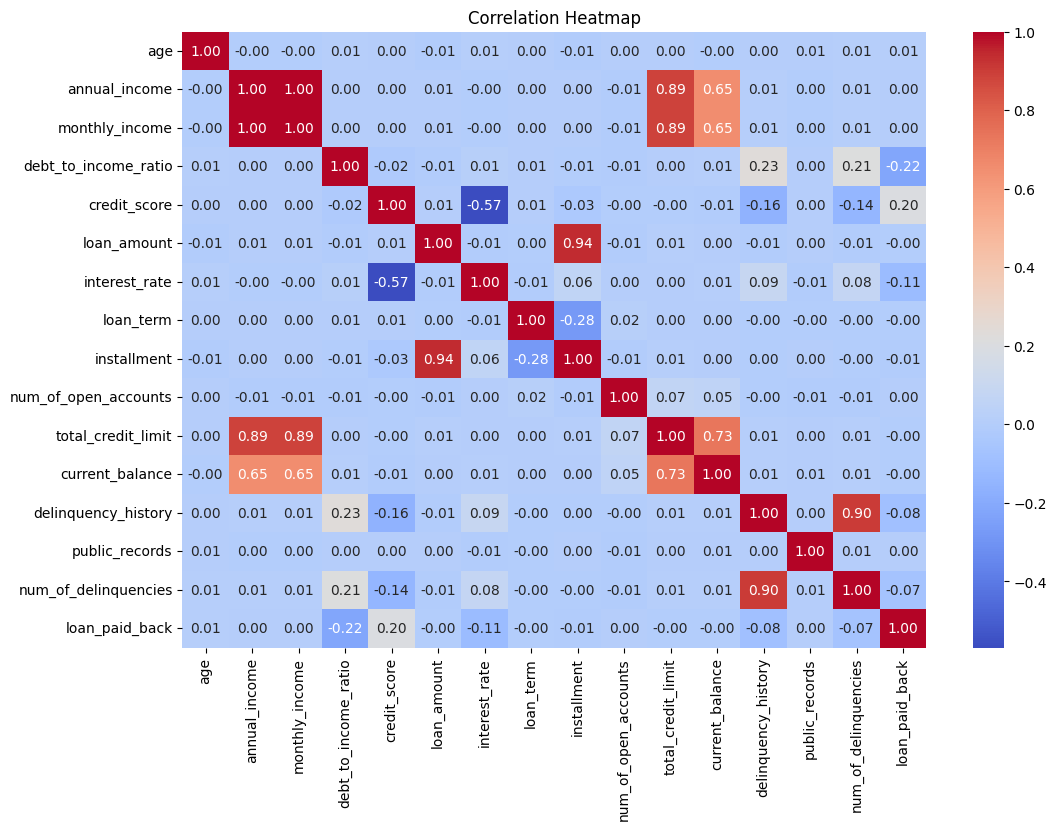

In [27]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

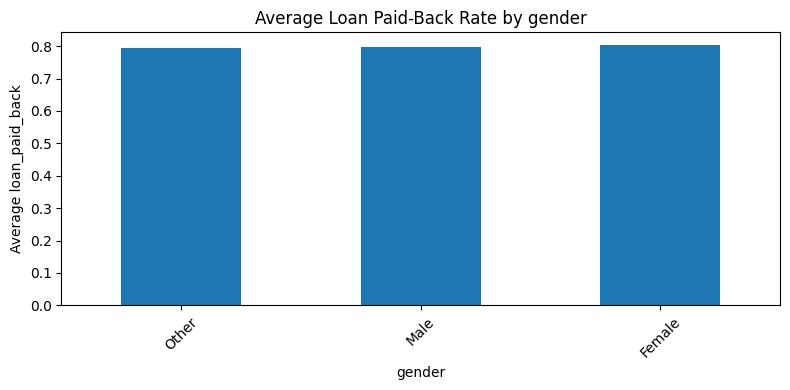

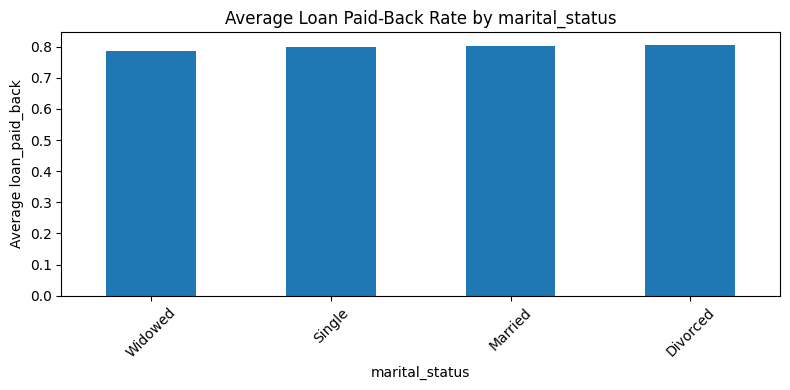

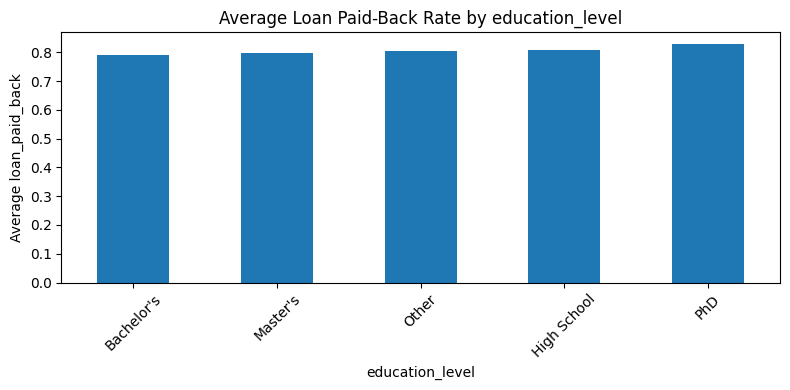

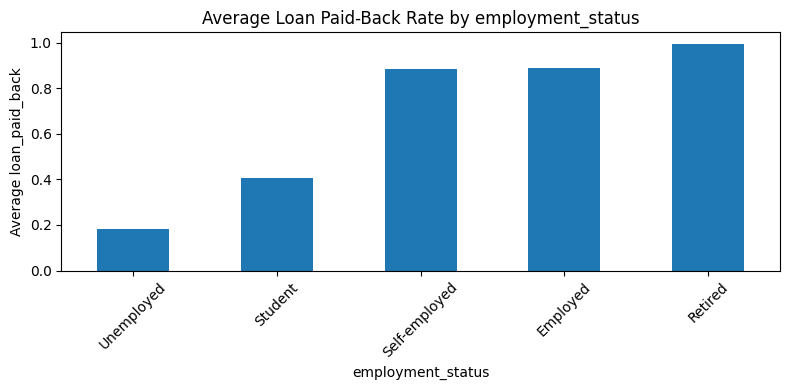

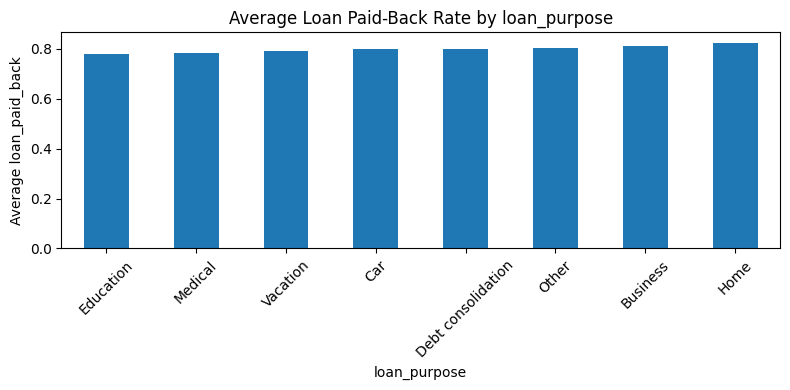

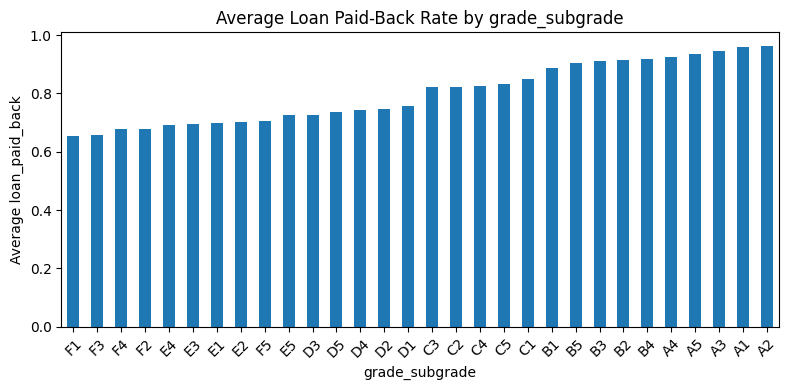

In [19]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8, 4))

    # Group by category and compute mean target value
    avg_paid_back = df.groupby(col)['loan_paid_back'].mean().sort_values()

    # Create bar plot
    avg_paid_back.plot(kind='bar')

    plt.title(f"Average Loan Paid-Back Rate by {col}")
    plt.ylabel("Average loan_paid_back")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()